<a/ id='top'></a>
# Homework 2: Introduction to Probability and Simulation 
***

**Name**: **Elena Ingraham**

***

This assignment is due on Moodle by **5 PM on Friday June 15**. Your solutions to theoretical questions should be **done in Markdown/MathJax** directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code.
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4)

---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import random
%matplotlib inline

***
<a/ id='p1'></a>
[Back to top](#top)

### [20 pts] Problem 1

Access the data from URL https://www.stat.berkeley.edu/~statlabs/data/babies.data and store the information in a Pandas DataFrame.  These data are a subset from a much larger study dealing with child health and development.  A description of the variables can be found at https://www.stat.berkeley.edu/~statlabs/labs.html#babies, and a brief summary is given below.

- **bwt**: birth weight (ounces; 999 if unknown) 
- **gestation**: length of pregnancy in days (999 if unknown)
- **parity**: 0=first born, 9=unknown
- **age**: mother's age in years
- **height**: mother's height in inches (99 if unknown)
- **weight**: mother's prepregnancy weight in pounds (999 if unknown)
- **smoke**: smoking status of mother; 0=not now, 1=yes now, 9=unknown

These data are also available on the course Piazza page, under the Resources tab.

In [ ]:
df = pd.read_csv("https://www.stat.berkeley.edu/~statlabs/data/babies.data", delim_whitespace=True)
df.head(10)

,bwt,gestation,parity,age,height,weight,smoke
0,120,284,0,27,62,100,0
1,113,282,0,33,64,135,0
2,128,279,0,28,64,115,1
3,123,999,0,36,69,190,0
4,108,282,0,23,67,125,1
5,136,286,0,25,62,93,0
6,138,244,0,33,62,178,0
7,132,245,0,23,65,140,0
8,120,289,0,25,62,125,0
9,143,299,0,30,66,136,1


In [ ]:
df.count()

bwt          1236
gestation    1236
parity       1236
age          1236
height       1236
weight       1236
smoke        1236
dtype: int64

**Part A**: Create a clean data set that removes subjects if any observations on the subject are unknown.  Note that that collectors of the data set used values like $9$, $99$, $999$, to denote unknown values.  You can look at the documentation linked in the problem description to determine which unknown-value marker was used for each characteristics.  Store the modified data set in a Pandas DataFrame called dfBabies. 

In [ ]:
for index, row in df.iterrows():
    if (row['bwt'] >= 999):
        df.drop(index, inplace = True)
    elif (row['gestation'] == 999):
        df.drop(index, inplace = True)
    elif (row['parity'] == 9):
        df.drop(index, inplace = True)
    elif (row['height'] == 99):
        df.drop(index, inplace = True)
    elif (row['weight'] == 999):
        df.drop(index, inplace = True)
    elif (row['smoke'] == 9):
        df.drop(index, inplace = True)
dfBabies = pd.DataFrame(df)

In [ ]:
dfBabies.count()


bwt          1175
gestation    1175
parity       1175
age          1175
height       1175
weight       1175
smoke        1175
dtype: int64

**Part B**: Use the information in dfBabies to create a density histogram of the birth weights of babies whose mothers have never smoked (smoke=0) and another histogram placed directly below the first in the same graphics device for the birth weights of babies whose mothers currently smoke (smoke=1).  Make the range of the horizontal axis $30$ to $180$ (ounces) for both histograms.  Make sure to give each subplot titles and label axes. 

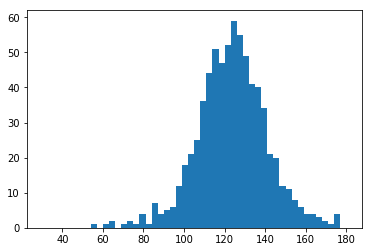

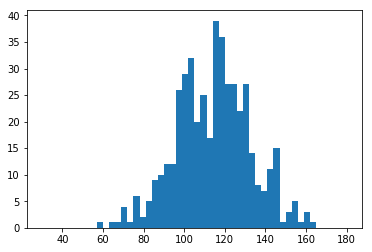

In [ ]:
dfNonSmoke = dfBabies.copy()
dfSmoke = dfBabies.copy()
for index, row in dfNonSmoke.iterrows():
    if (row['smoke'] == 1):
        dfNonSmoke.drop(index, inplace = True)
for index, row in dfSmoke.iterrows():
    if (row['smoke'] == 0):
        dfSmoke.drop(index, inplace = True)
plt.hist(dfNonSmoke['bwt'], bins = 50, range = (30,180), label = "Non-Smoker Birth Weight Distribution", stacked = False)
plt.show()
plt.hist(dfSmoke['bwt'], bins = 50, range = (30,180), label = "Smoker Birth Weight Distribution", stacked = False)
plt.show()


**Part C**: Based on the histograms in **Part B**, characterize the distribution of baby birth weights for both non-smoking and smoking mothers.

**The non-smoker distribution is dense and unimodal, whereas the smoker distribution is multimodal. **

**Part D**: What are the mean and median weight difference between babies of smokers and non-smokers?  Can you think of any reason not to use the mean as a measure of center to compare birth weights for this problem? 

In [ ]:
alpha1 = round(dfNonSmoke.bwt.mean(), 3)
alpha2 = round(dfSmoke.bwt.mean(),3)
med1 = dfNonSmoke.bwt.median()
med2 = dfSmoke.bwt.median()

In [ ]:
difference = alpha1 - alpha2
print("Difference in Median:")
print(round(difference, 3))

Difference in Median:
9.261


In [ ]:
diff_med = med1 - med2 
print("Difference in Median:")
print(diff_med)

Difference in Median:
8.0


**The median may not be a good measure to compare the datasets because the non-smoker distribution is sparse, and the outliers provide a lot of important information. Since the data is in regards to birthweight, the lowest values are extremely important for assessing risk. Since the mean is sensitive to this skewing, it provides a better understanding of the difference in birthweight between smoking and non-smoking mothers. **

**Part E**: Create side-by-side box-and-whisker plots to compare the birth weights of babies whose mothers never smoked and those who currently smoke.  Use the box-and-whisker plot conventions discussed in lecture, and be sure to label your axes and any relevant components of the plot!

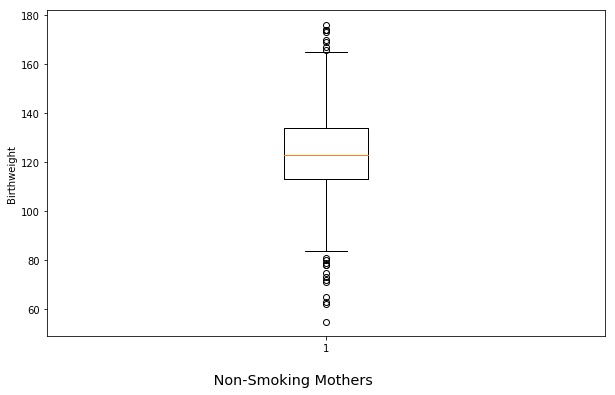

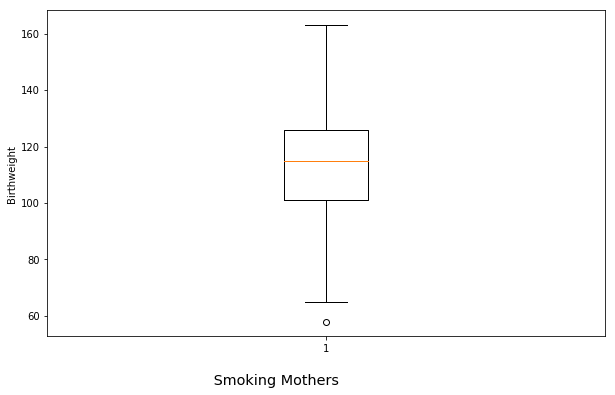

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))
plt.boxplot(dfNonSmoke['bwt'], showfliers = True)
ax1.set_ylabel('Birthweight')
plt.figtext(0.35, 0.013, ' Non-Smoking Mothers', color='black', weight='roman', size='x-large')
plt.show()
fig, ax1 = plt.subplots(figsize=(10, 6))
plt.boxplot(dfSmoke['bwt'], showfliers = True)
ax1.set_ylabel('Birthweight')
plt.figtext(0.35, 0.013, ' Smoking Mothers', color='black', weight='roman',
            size='x-large')
plt.show()

**Part F**: Using the box-and-whisker plots from **Part E** comment on the distributions of body weights of babies within each smoking / non-smoking groups as well as the comparison of the two classes. 

**Based on the boxplots, we can see that the distribution of non-smoking mothers is much denser than the non-smokers. This makes sense after comparing the plots with the histograms made previously. In the smoking mother's histogram we can see a chunk missing, which is represented by a bigger box in the boxplot. Whereas the non-smoking mother's have a dense, normal distribution which is represented by the small box in the boxplot. **

***
<a/ id='p2'></a>
[Back to top](#top)

### [20 points] Problem 2

To play a game, you have a bag containing 28 fair [four-sided dice](https://en.wikipedia.org/wiki/Four-sided_die), with faces `{1,2,3,4}`.  This bag also contains 10 fair six-sided dice (faces `{1,2,3,4,5,6}`) and 2 fair twenty-sided dice (faces `{1,2,3,4,...,19,20}`).  Call these 3 classes of die "Four", "Six" and "Twenty" (or F, S, and T, for short).  You grab one die at random from the box.  

Work the following problems by hand unless otherwise stated (but don't be afraid to simulate to check your result!). 

**Part A**: You roll your die one time.  What is the probability of the event $R_5$, that you roll a 5?  Include at least 4 decimal places in your answer.

In [ ]:
print('Probability of Rolling a five: ')
print('{:.3%}'.format(round((40/212),3)))

Probability of Rolling a five: 
18.900%


**Part B**: Suppose you roll a 5.  What is the probability that the die you chose from the box is a Six-sided die? 

In [ ]:
print("Probability of a six-sided die, given you roll a 5: ") #P(A | R5) = P(B and A)/P(B) #P(B | A) = P(A and B)/P(A)
p5 = (40/212)
p_5and6 =  (((1/4)*(1/6))/ p5 )                  #P(Six ∩ B) = P(Six) P(R5|Six) 
print('{:.3%}'.format(p_5and6))

Probability of a six-sided die, given you roll a 5: 
22.083%


**Part C:**  Are the events $R_5$ and $S$ independent?  Justify your answer **using math**.

In [ ]:
#calculate P(A), P(B), and P(A ∩ B)
#then check whether P(A ∩ B) equals P(A)P(B). 
#If they are equal, A and B are independent; if not, they are dependent. 

In [ ]:
p5_or_6 = (10/40)*(1/6)    #P(A ∩ B) = P(A) P(B|A) #P(A) = p5 P(B) = 
p5_times_p6 = p_5and6 * p5             
print(round(p5_times_p6, 3))
print(round(p5_or_6, 3))


0.042
0.042


**Since the probabilities are equal, so the events are independent.**

**Part D:**  Suppose you roll your die $n$ times and record each outcome.  Obviously, if you roll 5 or 6 you know you did *not* pick a Four-sided die, and if you roll a 7 or higher, you must have picked a Twenty-sided die.

But, if you roll $n$ times in a row and get only 1, 2, 3 or 4, you would have a stronger belief that you in fact grabbed one of the Four-sided dice.  Let $E_n$ be the event that you roll $n$ rolls of 1, 2, 3 or 4 in a row.  For example, one outcome in $E_3$ is the sequence 2, 3, 1.

Given that you roll a single value of 1, 2, 3 or 4, what is the probability that you have grabbed a Four-sided die?  That is, calculate **by hand** $P(F \mid E_1)$.

In [ ]:
#P(B | A) = P(A and B)/P(A)
#212 total numbers 
#40 1,2,3,4 = 160 opportunities 
pFourSide = ((28/40)*(4/4))/(160/212)
print('{:.3%}'.format(pFourSide))

92.750%


$P(F \mid E_1)$. = 18.550%

**Part E**:  

First, work out **by hand** a formula for the probability in general that you are rolling a Four-sided die, given that you have rolled $n$ values in a row that are 1, 2, 3 or 4 (that is, $E_n$).  So you want a formula for $P(F \mid E_n)$ in terms of $n$.

Then, define a function `prob_four` to calculate $P(F \mid E_n)$.  This function should only take one positive integer argument, $n$.

Verify that your function is performing as expected by checking your answer to **Part C**.

In [ ]:
def prob_four(n):
        p = (10/40)*( np.power((4/6),1)/(160/212)) + (2/40)*(np.power((4/20),1)/(160/212))
        new_roll = False
        p4 = (((28/40)*((4/4)))/(160/212))
        bag_of_die = [4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,6,6,6,6,6,6,6,6,6,6,20,20]
        rolls = n
        for i in range(n):
            die = random.choice(bag_of_die)
            #print(die)
            if (die == 4):
                p4 = 1 - (p/n) #(((28/40)*((4/4)))/(160/212))
            if (die == 6):
                new_roll = True
                p += ((10/40)*( np.power((4/6),i)/(160/212)))
            elif(die == 20):
                new_roll = True
                p += ((2/40)*(np.power((4/20),i)/(160/212)))
        return p4
mean_prob = (prob_four(10) + prob_four(10) + prob_four(10) + prob_four(10)+prob_four(10)+prob_four(10) + prob_four(10) + prob_four(10) + prob_four(10)+prob_four(10))/10
print(mean_prob)





0.9535694112


**Part F:**  What is the smallest value of $n$ successive rolls of 1, 2, 3 or 4 that would make you believe that there's a better-than-95% chance that the die you grabbed is Four-sided?  Plugging larger and larger values for $n$ into your `prob_four` function is a very reasonable way to check this.

**After ten rolls I would be confident that there's a better than 95% chance that the die is four-sided, based on the simulation above**

***
<a/ id='p3'></a>
[Back to top](#top)

### [30 points] Problem 3

When Chris and Dan leave work in the CU Engineering Center ($E$), they each head for one of five other locations: the Gym to get big ($G$), the Library to get learned ($L$), the Boulder Reservoir to have a nice swim ($R$), the Hill to have a sandwich ($H$), or to Brewing Market to have a nice Coffee ($C$).  

Here are some rules governing their movements throughout the fair city of Boulder:
* When Chris and/or Dan is leaving one location, they randomly select one of the available adjacent locations, with equal probability.
* This includes back-tracking, but note that to return to their original location would require 2 moves.
* Assume that all moves require the same amount of time.
* They are also not allowed to stay put; they always must move to some *other* adjacent location.
* Chris and Dan, being the think-for-yourselfers that they are, also act **independently** of one another. That is, the probability that Chris goes from one place to another is independent of the probability of Dan's movements.

<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/chris_and_dan_statespace.png" style="width: 300px;"/>

**Part A**: Compute (by hand) the probability that Dan ends up at the the Library ($L$) after first visiting one other location, after he is initially at the Engineering Center ($E$). 

In [ ]:
print("Probability Dan ends up at the Library: ")
print('{:.3%}'.format(2/10))

Probability Dan ends up at the Library: 
20.000%


**Part B**: Compute (by hand) the probability that Chris ends up at the Gym _either_ as his first _or_ second location visited after leaving the Reservsoir. (Again, assume that Chris wanders the streets of Boulder randomly using the same rules described above.)

In [ ]:
print("Probability Chris ends up at the gym as first or second location: ")
print('{:.3%}'.format((2/8), 4))

Probability Chris ends up at the gym as first or second location: 
25.000%


**Part C**: Suppose that Chris works late at the Engineering Center, while Dan goes to the Hill.  Later, they both leave and wander around, randomly and independently of one another, as described above. 
1. What is the probability that they run into each other in the same location on the first location visited?  
2. Given their two initial locations, what is the probability that they meet at the Hill after 2 moves?

In [ ]:
#Position 3 is equal for Chris and Dan 
print('1.', '{:.3%}'.format((3/18)))
print('2.', '{:.3%}'.format(((1/11)*(3/13))))
#e 13

1. 16.667%
2. 2.098%


**Part D**: Write a simulation to confirm that your by-hand calculations in **Part A**, **Part B**, and **Part C** (both parts of C) are correct. Make sure you run your simulations for enough trials that your estimates are reasonably close to your analytic results. In addition to showing your code, you should explain in Markdown (not just in code comments) what your code is doing and why it is a reasonable approximation of the probabilities in **Part A**, **Part B**, and **Part C**.  

In [ ]:
graph = {'L': ['L','C', 'E', 'G', 'H'],
             'C': ['C','H', 'L', 'E'],
             'E': ['E','C', 'L', 'G', 'R'],
             'G': ['G','H', 'L', 'E', 'R'],
             'H': ['H','G', 'L', 'C'],
             'R': ['R','G', 'E']}
def find_path(graph, start, end, path=[]):
        path = path + [start]
        if start == end:
            return path
        if start not in graph:
            return None
        for node in graph[start]:
            if node not in path:
                newpath = find_path(graph, node, end, path)
                if newpath: return newpath
        return None
find_path(graph, 'E','R' )

['E', 'C', 'H', 'G', 'R']

In [ ]:
 def find_all_paths(graph, start, end, path=[]):
        path = path + [start]
        if start == end:
            return [path]
        if start not in graph:
            return []
        paths = []
        for node in graph[start]:
            if node not in path:
                newpaths = find_all_paths(graph, node, end, path)
                for newpath in newpaths:
                    paths.append(newpath)
        return paths
find_all_paths(graph, 'L', 'R')

[['L', 'C', 'H', 'G', 'E', 'R'],
 ['L', 'C', 'H', 'G', 'R'],
 ['L', 'C', 'E', 'G', 'R'],
 ['L', 'C', 'E', 'R'],
 ['L', 'E', 'C', 'H', 'G', 'R'],
 ['L', 'E', 'G', 'R'],
 ['L', 'E', 'R'],
 ['L', 'G', 'H', 'C', 'E', 'R'],
 ['L', 'G', 'E', 'R'],
 ['L', 'G', 'R'],
 ['L', 'H', 'G', 'E', 'R'],
 ['L', 'H', 'G', 'R'],
 ['L', 'H', 'C', 'E', 'G', 'R'],
 ['L', 'H', 'C', 'E', 'R']]

In [ ]:
def randomPath(n, position):
    same = 0
    sun = 0
    rowz = 0 
    pathz = 0
    pathArray = ['L','C', 'E', 'G', 'H', 'R']
    for i in range(n):
        endC = random.choice(pathArray)
        endD= random.choice(pathArray)
        chris = find_all_paths(graph, 'E', endC)
        dan = find_all_paths(graph, 'H', endD)
        #print(dan)
        #print(chris)
        lengthC = (len(chris))
        lengthD = (len(dan))
        lengthDiff = lengthC - lengthD
        if ((lengthD > position) & (lengthC > position)):
            sun += 1
            for row in chris:
                pathz +=1
                for row1 in dan:
                    pathz += 1
                    for i in row:
                        rowz += 1
                        for j in row1:
                            rowz += 1
                            if(row[position] == row1[position]):
                                same += 1
                                rowz += 1
        else:
            pathz +=1
            #rowz += 1
    #print(same)
    #print(pathz)
    #print(rowz)
    probability = same/rowz
    return ('{:.3%}'.format(probability) )#(np.sqrt(same)/ n)
randomPath(10000, 1)

'17.070%'

In [65]:
graph2 = {'L': ['L','C', 'E', 'G', 'H', 'H2'],
             'C': ['C','H', 'L', 'E','H2'],
             'E': ['E','C', 'L', 'G', 'R','H2'],
             'G': ['G','H', 'L', 'E', 'R','H2'],
             'H': ['H','G', 'L', 'C'],
             'H2':['H','G', 'L', 'C'],
             'R': ['R','G', 'E','H2']}
def randomHillPath(n, position):
    same = 0
    sun = 0
    rowz = 0 
    pathz = 0
    pathArray = ['L','C', 'E', 'G', 'H', 'R']
    for i in range(n):
        endC = random.choice(pathArray)
        endD= random.choice(pathArray)
        chris = find_all_paths(graph2, 'E', endC)
        dan = find_all_paths(graph2, 'H', endD)
        lengthC = (len(chris))
        lengthD = (len(dan))
        lengthDiff = lengthC - lengthD
        if ((lengthD > position) & (lengthC > position)):
            sun += 1
            for row in chris:
                pathz +=1
                for row1 in dan:
                    pathz += 1
                    if(len(row)>position):
                        if(len(row1)>position):
                            for i in row:
                                rowz += 1
                                for j in row1:
                                    rowz += 1
                                    if((row[position] == 'H')): #& (row1[position] == 'H')):
                                        if(row1[position] == 'H2'):
                                                same += 1
                                                rowz += 1
            else:
                pathz +=1
    probability = same/rowz
    return ('{:.3%}'.format(probability) )#(np.sqrt(same)/ n)
randomHillPath(1000, 2)

'3.059%'

***
<a/ id='p4'></a>
[Back to top](#top)

### [30 points] Problem 4


In this problem you will write some code to simulate the game of **Miniopoly** (a very rough approximation of [Monopoly](https://en.wikipedia.org/wiki/Monopoly_(game)).  The game consists of a round board with 40 "squares" numbered from $0$ to $40$, where squares $0$ and $40$ are [coincident](https://en.wikipedia.org/wiki/Coincident) and called **GO**.  A player starts on **GO** with \$200 in their pocket.  On each turn the player rolls a pair of dice and then moves a number of spaces equal to the sum of the dice.  Landing on different squares have different results: 

- Squares 2, 7, 17, 22, 33, and 36 cause you to draw a card.  The cards tell you to collect \$50, \$100 or \$200, or pay the bank \$50 or \$100.  There is always an equal probability associated with each of these possible cards.

<p> </p>

- Squares 0, 10, and 20 do not trigger any action 

<p> </p>

- Square 30 is **Go To Jail**, which sends the player directly to **Jail** and ends the turn 

<p> </p>

- If a player starts a turn from **Jail** she rolls two dice: 

    - If the player rolls doubles (i.e. the dice have equal values) the player moves from Square 10 a number of squares equal to the sum of the dice
    
    - If the player rolls anything other than doubles she pays the bank \$20 and remains in **Jail** 
    
<p> </p>

- If the player passes or lands on **GO** she collects \$200. 

<p> </p>

- If the player lands on any other square not mentioned above, she pays the bank an amount equal to the square's number (e.g. if she lands on Square 29 she pays the bank \$29). 

<p> </p>

If at any point the player has \$0 or less they go bankrupt and the game ends. 

<br>

**Part A**: Complete the function miniopoly_turn below. The function should simulate one turn of Miniopoly.  It should take as arguments the player's current location on the board as well as the player's current cash reserves, and return the player's new location and cash reserves after the turn has completed. Note that if a player goes bankrupt during the game you should return their cash as 0 instead of a negative value.  

In [ ]:
cardSquares = [2, 7, 17, 22, 33, 36]
nothing = [10, 20]
def miniopoly_turn(square, cash):
    if cash is None:
        cash = 0
    if square is None:
        square = 0
    if (square >= 40):
        square = square - 40
    if(square in cardSquares):
        cash = cardDraw(cash)
    elif(square == 30):
        square = roll_dice(square)
        cash += -20
    elif(square == 30):
        cash -= 20
        print('in jail')
        roll_dice(square)
    elif(square == 0):
        cash += 200
    elif(square == 40):
        cash += 200
        square = 0 
    elif(square in nothing):
        square = square
    else:
        cash -= square
    if(cash <= 0):
        cash = 0
        return
    return cash
miniopoly_turn(0,10)
def cardDraw(cash):
    cards = [-100, -50, 50, 100, 200]
    cash = cash + random.choice(cards)
    return cash
def roll_dice(square):
    die1 = [1, 2, 3, 4, 5, 6]
    die2 = [1, 2, 3, 4, 5, 6]
    roll1 = random.choice(die1)
    roll2 = random.choice(die2)
    if(roll1 == roll2):
        square = 10 + roll1 + roll2
    else:
       # print('still in jail')
        square = 30
    return square

**Part B**: Use your function from **Part A** to Simulate at least 5000 30-turn games of Miniopoly and make a frequency histogram of the player's cash at the end of the game. Be sure to label your axes!

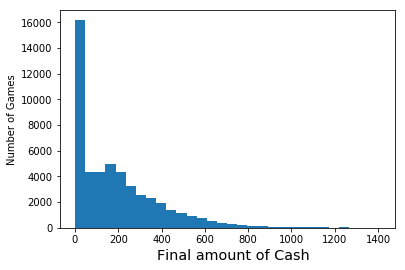

In [66]:
die = [1, 2, 3, 4, 5, 6]
def miniopoly_game(square, cash, games):
    gameEnds = []
    for i in range(games):
        square = 0
        cash = 0
        jail = 0
        for i in range(30):
            cash = miniopoly_turn(square, cash)
            square = (square + random.choice(die))
            if (square == 30):
                jail = jail + 1
            if (square >= 40):
                square -= 40
            #print(cash, square)
        if cash is None:
            cash = 0 
        gameEnds = np.append(gameEnds, cash) 
        if(jail > 0):
            gameEnds = np.insert(gameEnds, 0, 1)
        elif(jail == 0):
            gameEnds = np.insert(gameEnds, 0, 0)
    return (gameEnds)
gamesRun = miniopoly_game(0,0,50000)
gamesTotal = gamesRun[(len(gamesRun)//2):]
jailRun = gamesRun[:(len(gamesRun)//2)]
#print(len(gamesRun))
ax1 = plt.subplot2grid((40,40), (0,0), rowspan=40, colspan=40)
ax1.set_ylabel('Number of Games')
plt.hist(gamesTotal, bins = 30, label = "Game Winning Distribution")
plt.figtext(0.35, 0.013, 'Final amount of Cash', color='black', weight='roman',size='x-large')
plt.show()   
#plt.hist(jailRun, bins = 10)
#plt.show()

**Part C**: Use your codes to estimate the probability that a player goes bankrupt in the first 30 turns of the game. 

In [120]:
games = 50000
gamesArray = miniopoly_game(0, 0, games).astype('int64')
gamesTotal = gamesArray[(len(gamesRun)//2):]
print(gamesTotal)
bankrupt = 0
for i in range(len(gamesTotal)):
    if(gamesTotal[i] <= 0):
        bankrupt = bankrupt + 1
print(bankrupt)
p_bankr = bankrupt/(games/2)
print('Probability Player Goes Bankrupt in First 30 Turns')
print('{:.3%}'.format(p_bankr))

[  0 116 128 ..., 256 196   0]
12460
Probability Player Goes Bankrupt in First 30 Turns
49.840%


**Part D**: Use your codes to estimate the probability that a player goes bankrupt in the first 30 turns _given_ that they went to **Jail** at least once.  Is a player more or less likely to go bankrupt if they've been to **Jail**?  

In [119]:
print("Probability of going to jail: ")
jailRun = gamesArray[:(len(gamesArray)//2)]
jails = jailRun.sum()
p_jail = jails/len(jailRun)
print('{:.3%}'.format(p_jail))
        

Probability of going to jail: 
54.202%


In [118]:
#jail and bankrupt 
jailrupt = 0
jail = 0 
for i in range(len(gamesTotal)):
    if(jailRun[i] == 1):
        jail += 1
    if((gamesTotal[i] == 0) & (jailRun[i] == 1)):
        jailrupt += 1
bank_sect_jail = (jailrupt/jail)
p_given_jail = bank_sect_jail/ p_bankr
print("Probability that a player goes bankrupt in the first 30 turns, given that they went to Jail at least once:")
print('{:.3%}'.format(p_given_jail))

Probability that a player goes bankrupt in the first 30 turns, given that they went to Jail at least once:
49.744%


**A player is as likely to go bankrupt if they've been to jail, since the probability of going to bankrupt if you've been to jail is ~50% and just going bankrupt is ~50% **

**Part E**: Use your code from **Part A** to estimate the probability (either directly or using Bayes' Rule) that a player has gone to jail at least once, given that the player went bankrupt in the first 30 turns.

**The probability of a player going to jail, given they went bankrupt, calculated by using Bayes' Rule:**

In [116]:
# bayes P( jail | bankrupt) =  P(bankrupt |jail) * P(bankrupt) / P (Jail)
print("Probability that a player goes bankrupt in the first 30 turns, given that they went to Jail at least once:")
p_bankr_given_jail = (p_given_jail* p_bankr)/p_jail
print('{:.3%}'.format(p_bankr_given_jail))


Probability that a player goes bankrupt in the first 30 turns, given that they went to Jail at least once:
91.291%
